# Music Century Classification

In this project, we will build models to predict which
**century** a piece of music was released.  We will be using the "YearPredictionMSD Data Set"
based on the Million Song Dataset. The data is available to download from the UCI 
Machine Learning Repository. Here are some links about the data:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Data

Start by setting up a Google Colab notebook

- https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb

To process and read the data, we use the popular `pandas` package for data analysis.

In [20]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

Now that your notebook is set up, we can load the data into the notebook. The code below provides
two ways of loading the data: directly from the internet, or through mounting Google Drive.
The first method is easier but slower, and the second method is a bit involved at first, but
can save you time later on. You will need to mount Google Drive for later assignments, so we recommend
figuring how to do that now.


In [21]:
load_from_drive = False

if not load_from_drive:
  csv_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip"
else:
  from google.colab import drive
  drive.mount('/content/gdrive')
  csv_path = '/content/gdrive/My Drive/Colab Notebooks/Intro to DL/Assignment 1/YearPredictionMSD.txt.zip' # TODO - UPDATE ME WITH THE TRUE PATH!

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path, names=t_label + x_labels)

Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [22]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [23]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [24]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

why would it be problematic to have
some songs from an artist in the training set, and other songs from the same artist in the
test set?

It would be problematic to have some songs from an artist in the training set, and other songs from the same artist in the test set because we want to avoid from a case the
system will predict the decade of a song according to its artist, 
i.e. we want our learning process would be able to generalize and will not effectively memorize the training data. 

In [25]:
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

It can be beneficial to **normalize** the columns, so that each column (feature)
has the *same* mean and standard deviation.

In [26]:
feature_means = df_train.mean()[1:].to_numpy() # the [1:] removes the mean of the "year" field
feature_stds  = df_train.std()[1:].to_numpy()

train_norm_xs = (train_xs - feature_means) / feature_stds
test_norm_xs = (test_xs - feature_means) / feature_stds

Notice how in our code, we normalized the test set using the *training data means and standard deviations*.
This is *not* a bug.

In [1]:
# Write your explanation here
# In order to test system's accuracy, We want our test results and training results would be on the same scale, therefore, using test set means and standard deviations would be improper.
# For example if our test set has irregular values, relative to our training set("Information leakege"),
# normalizing test set according to its mens and standard deviations can change its label(different from the learning model).

# In data-driven schemes, since we do not have access to the true distribution we resort to using the empirical risk fuinction. 
# According to the law of large numbers - if we take a sufficient amount of data, the empirical risk function should converge with the true risk function. 
# Due to this, it is safe to assume that the training mean and SD is closer to the real mean and SD since the training set is larger than the test set and due to the fact that we assume the training the test sets share a distribution.


Finally, we'll move some of the data in our training set into a validation set.

In [28]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

## 2. Classification

We will first build a *classification* model to perform decade classification.

In [29]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))
    
def cross_entropy(t, y):
  epsilon = 1e-10
  # avoiding from y = 0 or y =1:
  for i in range(len(y)):
    if y[i] == 1:
      y[i] = y[i] - epsilon
    elif y[i]==0:
        y[i] = y[i] + epsilon
  return -t * np.log(y) - (1 - t) * np.log(1 - y)

def cost(y, t):
  return np.mean(cross_entropy(t, y))

def get_accuracy(y, t):
  acc = 0
  N = 0
  for i in range(len(y)):
    N += 1
    if (y[i] >= 0.5 and t[i] == 1) or (y[i] < 0.5 and t[i] == 0):
      acc += 1
  return acc / N

function `pred`computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by: 
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [30]:
def pred(w, b, X):
  """
  Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.

  Preconditions: np.shape(w) == (90,)
                 type(b) == float
                 np.shape(X) = (N, 90) for some N

  >>> pred(np.zeros(90), 1, np.ones([2, 90]))
  array([0.73105858, 0.73105858]) # It's okay if your output differs in the last decimals
  """

  # Checking if the preconditions are fulfilled
  if not np.shape(w) == (90,):
    raise Exception('The shape of weights vector w must be (90,)')
  
  if not type(float(b)) == float:
    raise Exception('b must be float type')

  if not np.shape(X)[1] == 90:
    raise Exception('Shape of X must be (N, 90)')

  y = np.zeros(np.shape(X)[0])    
  z = np.dot(X,w) + b
  y = sigmoid(z)
  return y

# pred(np.zeros(90), 1, np.ones([2, 90]))



Write a function `derivative_cost` that computes and returns the gradients 
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.




In [31]:
def derivative_cost(X, y, t):
  """
  Returns a tuple containing the gradients dLdw and dLdb.

  Precondition: np.shape(X) == (N, 90) for some N
                np.shape(y) == (N,)
                np.shape(t) == (N,)

  Postcondition: np.shape(dLdw) = (90,)
           type(dLdb) = float
  """
  if not np.shape(X)[1] == 90:
    raise Exception('Shape of X needs to be (N, 90)')
  if not (np.shape(y)[0] == np.shape(t)[0] and np.shape(X)[0] == np.shape(y)[0]):
    raise Exception('Length of y,t and X needs to be equal')

  D_size = np.shape(X);
  dLdw = np.dot(np.transpose(y-t), X) * (1/D_size[0])
  dLdb = np.sum(y-t)* (1/D_size[0])
  
  return (dLdw, dLdb)




# **Explanation on Gradients**




As we know, the activation function chosen for this task is the sigmoid fuction: 
\begin{align}
        \sigma(z) = \frac{1}{1+\exp(-z)}
    \end{align}
While the loss function is the cross entopy loss:
\begin{align}
        l_{CE}(f,x,s) = -\sum_{k=1}^K \mathbb{1}_{s_k = s}\log f_k(x)
    \end{align}
Plugging $f(x) = \sigma(w^T\cdot x + b)$ into the loss funcion we get:
\begin{align}
 l_{CE}(f,x,s) = -\sum_{k=1}^K \mathbb{1}_{s_k = s}\log \frac{1}{1+\exp(-(w^T\cdot x + b))}
\end{align}
Since in our case there are only 2 different labels [0,1] we can write $l_{CE}(f,x,s)$ explicitly:
\begin{align}
 l_{CE}(f,x,s) = -[ t_1\log \frac{1}{1+\exp(-(w^T\cdot x + b)} + t_2\log (1 - \frac{1}{1+\exp(-(w^T\cdot x + b))})]
 = -[ t\cdot\log \frac{1}{1+\exp(-(w^T\cdot x + b))} + (1-t)\log(1 - \frac{1}{1+\exp(-(w^T\cdot x + b))})]
\end{align}
Where $t$ is the truth label.

Next, we can define the empirical risk:
\begin{align}
L_D = \frac{1}{|D|} \sum_{{x_t, s_t \in D}} l_{CE}(f,x,s) =\\
 = \frac{1}{|D|} \sum_{{x_t, s_t \in D}} -[ t\cdot\log \sigma(z) + (1-t)\log(1 - \sigma(z))]\qquad (*)
\end{align}
where $z = w^T\cdot x+b$
Next, we can simplify the expression:
\begin{align}
\log \sigma(z) = \log \frac{1}{1+\exp{(-z)}} = -\log (1+\exp{(-z)}) \\
\log(1 - \sigma (z)) = \log (1 - \frac{1}{1+\exp{(-z)}}) = \log(\exp(-z)) - log (1+\exp{(-z)}) = -z - log (1+\exp{(-z)})
\end{align}

Plugging the above into (*) we get:
\begin{align}
L_D = -\frac{1}{|D|} \sum_{{x_t, s_t \in D}}[-t\cdot \log (1+\exp(-z)) + (1-t)(-z - \log (1+\exp{(-z)})] =\\
= -\frac{1}{|D|} \sum_{{x_t, s_t \in D}}[t\cdot z-z- \log (1+\exp{(-z)})] = \\ = -\frac{1}{|D|} \sum_{{x_t, s_t \in D}}[t\cdot z -\log(1+\exp{(z)})] = \\ = -\frac{1}{|D|} \sum_{{x_t, s_t \in D}}[t\cdot (w^T\cdot x_t +b) -\log(1+\exp{(w^T\cdot x_t +b))}] \qquad (**)
\end{align} 

Now that we have the explicit empirical risk $L_D$ we can find the partial derivatives:
\begin{align}
\frac{\partial}{\partial w} t\cdot (w^T\cdot x_t +b) = t\cdot x_t \\
\frac{\partial}{\partial b} t\cdot (w^T\cdot x_t +b) = t \\
\frac{\partial}{\partial w} [-\log(1+\exp{(w^T\cdot x_t +b)})] = -\frac{x_t\cdot \exp(w^T\cdot x_t+b)}{1+\exp{(w^T\cdot x_t +b)}} = -x_t\cdot \sigma(w^T\cdot x_t +b) \\
\frac{\partial}{\partial b} [-\log(1+\exp{(w^T\cdot x_t +b)})] = -\frac{\exp(w^T\cdot x_t +b)}{1+\exp{(w^T\cdot x_t +b)}} = -\frac{\exp(-(w^T\cdot x_t +b))\exp(w^T\cdot x_t +b)}{(\exp(-(w^T\cdot x_t +b))(1+\exp{(w^T\cdot x_t +b)})} = -\sigma(w^T\cdot x_t +b)
\end{align}
Using the above and (**) we get:
\begin{align}
\frac{\partial L_D}{\partial w} = -\frac{1}{|D|} \sum_{{x_t, s_t \in D}}[t\cdot x_t - x_t \cdot \sigma(w^T\cdot x_t +b)] = \frac{1}{|D|} \sum_{{x_t, s_t \in D}}[x_t\cdot (\sigma(w^T\cdot x_t +b) - t)] \\
\frac{\partial L_D}{\partial b} = -\frac{1}{|D|} \sum_{{x_t, s_t \in D}}[t-\sigma(w^T\cdot x_t +b)] = \frac{1}{|D|} \sum_{{x_t, s_t \in D}}[\sigma(w^T\cdot x_t +b) - t]
\end{align}
Finally, if we use $y=\sigma(w^T\cdot x_t + b)$ we get:
\begin{align}
\frac{\partial L_D}{\partial w} = \frac{1}{|D|} \sum_{{x_t, s_t \in D}}[x_t\cdot (y - t)] \\
\frac{\partial L_D}{\partial b} = \frac{1}{|D|} \sum_{{x_t, s_t \in D}}[y - t]
\end{align}






We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

 $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.

In our case $f(x)=L(w,b,X,t) = L_D = \frac{1}{|D|} \sum_{{D}} l_{CE}(w,b,X,t)$, so we can calculate $\frac{\partial\mathcal{L}}{\partial b}$ as:
\begin{align}
\frac{\partial\mathcal{L}}{\partial b} \approx \frac{\frac{1}{|D|}\sum_{{D}} l_{CE}(w,b+h,X,t) - \frac{1}{|D|}\sum_{{D}} l_{CE}(w,b,X,t)}{h}
\end{align}


In [32]:
h = 1e-10
w = np.zeros(90)
b = 1
X = np.ones([2, 90])
t = np.ones(2,)
y = pred(w,b,X);
y_plus_h = pred(w,b+h,X);

r2 = (cost(y_plus_h,t) - cost(y,t))/h;
r1 = derivative_cost(X, y, t);



print("The analytical results is -", r1[1])
print("The algorithm results is - ", r2)


The analytical results is - -0.2689414213699951
The algorithm results is -  -0.26894098059671023



Show that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [33]:
h = 1e-10
w = np.zeros(90)
b = 1
X = np.ones([2, 90])
t = np.ones(2,)

y = pred(w,b,X)
r2 = []
w_plus = np.copy(w)

for i in range(0,np.size(w)):
  
  w_plus[i] = w[i] + h
  y_plus_h = pred(w_plus,b,X);
  r2.append(((cost(y_plus_h,t) - cost(y,t))/h));
  w_plus = np.copy(w)

r1 = derivative_cost(X, y, t);
print("The analytical results is -", r1[0])
print("The algorithm results is - ", r2)



The analytical results is - [-0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142 -0.26894142
 -0.26894142 -0.2689414

Now that we have a gradient function that works, we can actually run gradient descent. 


In [34]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100, verbose=True):
  """
  Return the values of (w, b) after running gradient descent for max_iters.
  We use:
    - train_norm_xs and train_ts as the training set
    - val_norm_xs and val_ts as the test set
    - mu as the learning rate
    - (w0, b0) as the initial values of (w, b)

  Precondition: np.shape(w0) == (90,)
                type(b0) == float
 
  Postcondition: np.shape(w) == (90,)
                 type(b) == float
  """
  w = w0
  b = b0
  iter = 0
  iter_list = []
  val_acc_list = []
  val_cost_list = []

  global train_xs, train_norm_xs, train_ts  

  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_xs))
    train_norm_xs = train_norm_xs[reindex]
    train_ts = train_ts[reindex]
    

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs[i:(i + batch_size)]
      t = train_ts[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue

      # compute the prediction
      y = pred(w, b, X)

      # update w and b
      dLdw, dLdb = derivative_cost(X, y, t)
      w = w - mu * dLdw
      b = b - mu * dLdb

      # increment the iteration count
      iter += 1
      # compute and print the *validation* loss and accuracy
      if (iter % 10 == 0):         
        val_cost = cost(pred(w, b, val_norm_xs),val_ts.reshape(len(val_ts),));
        val_acc = get_accuracy(pred(w, b, val_norm_xs),val_ts.reshape(len(val_ts),))
        if verbose:
          print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
                iter, val_acc * 100, val_cost))
        iter_list.append(iter)
        val_acc_list.append(val_acc)
        val_cost_list.append(val_cost)

      if iter >= max_iters:
        break

  return w, b, (iter_list, val_acc_list, val_cost_list)




Call `run_gradient_descent` with the weights and biases all initialized to zero.


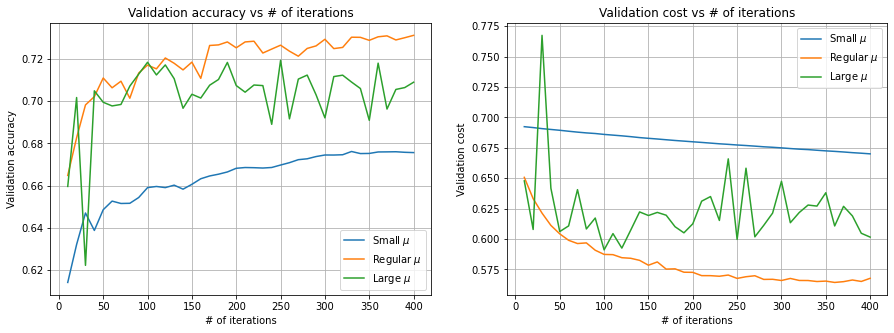

In [35]:
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# For this example we'll take mu=0.9 as the large example, mu=0.1 as the regular example and mu=0.001 as the small example
small_mu = run_gradient_descent(w0=np.zeros(90), b0=0, mu=0.001, max_iters=400, verbose=False)[2]

regular_mu = run_gradient_descent(w0=np.zeros(90), b0=0, mu=0.1, max_iters=400, verbose=False)[2]

large_mu = run_gradient_descent(w0=np.zeros(90), b0=0, mu=0.9, max_iters=400, verbose=False)[2]


# Plotting the accuracy vs iterations and cost vs iterations:
## Accuracy vs iterations
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(15,5))
ax1.plot(small_mu[0], small_mu[1])
ax1.plot(regular_mu[0], regular_mu[1])
ax1.plot(large_mu[0], large_mu[1])
ax1.set_title('Validation accuracy vs # of iterations')
ax1.set_xlabel('# of iterations')
ax1.set_ylabel('Validation accuracy')
ax1.legend([r'Small $\mu$', r'Regular $\mu$', r'Large $\mu$'])
ax1.grid(b=True)

## Cost vs iterations
ax2.plot(small_mu[0], small_mu[2])
ax2.plot(regular_mu[0], regular_mu[2])
ax2.plot(large_mu[0], large_mu[2])
ax2.set_title('Validation cost vs # of iterations')
ax2.set_xlabel('# of iterations')
ax2.set_ylabel('Validation cost')
ax2.legend([r'Small $\mu$', r'Regular $\mu$', r'Large $\mu$'])
ax2.grid(b=True)



First we can see that for a small value of $\mu$ ($=0.001$), both the validation accuracy and validation cost are slow to converge to an ideal value, if we compare this to the case where $\mu=0.1$ we can see that for the 'regular' value of $\mu$ we get much better results with far fewer iterations. \\
Next, for a large value of $\mu$ ($=0.9$), we see that both the validation cost and accuracy are very noisy, with their respective values hopping noisily from very good to very bad results. \\
The explaination for these behaviors is also that $\mu$ represents the step size for the stochastic descent, while taking small steps (small values of $\mu$) causes the stochastic descent to require many iterations, and taking large steps (large values of $\mu$) may cause the descent to miss the loss function minima.


Find the optimial value of ${\bf w}$ and $b$ using our code.

Iteration 1 of 10...
Iteration 2 of 10...
Iteration 3 of 10...
Iteration 4 of 10...
Iteration 5 of 10...
Iteration 6 of 10...
Iteration 7 of 10...
Iteration 8 of 10...
Iteration 9 of 10...
Iteration 10 of 10...


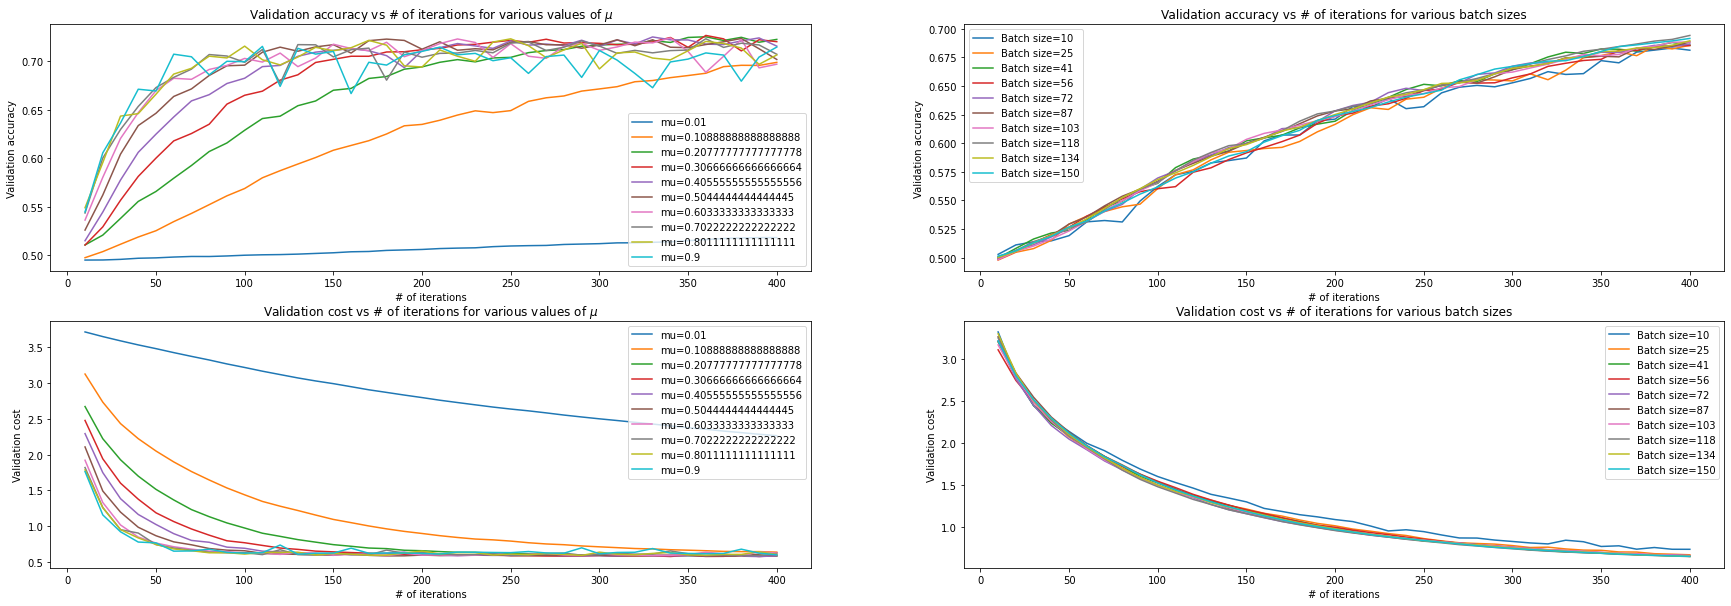

In [36]:
np.random.seed(42)
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

# We saw in the previous section that we got the best behavior around mu=0.1, so we'll plot the validation accuracy for various values of mu around that value
# Assuming that the learning rate and batch size are independent of one another, we'll also plot the validation accuracy for various batch sizes and then choose the one with the best preformance
mu = np.linspace(start=0.01, stop=0.9, num=10)
batch_size = np.linspace(start=10, stop=150, num=10, dtype=int)

# Plotting the validation accuracies and losses
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, figsize=(30,10))
ax1.set_title(r'Validation accuracy vs # of iterations for various values of $\mu$')
ax1.set_xlabel('# of iterations')
ax1.set_ylabel('Validation accuracy')
ax1.legend([f'mu={i}' for i in mu])
ax2.set_title('Validation accuracy vs # of iterations for various batch sizes')
ax2.set_xlabel('# of iterations')
ax2.set_ylabel('Validation accuracy')
ax2.legend([f'Batch size={i}' for i in batch_size])
ax3.set_title(r'Validation cost vs # of iterations for various values of $\mu$')
ax3.set_xlabel('# of iterations')
ax3.set_ylabel('Validation cost')
ax3.legend([f'mu={i}' for i in mu])
ax4.set_title('Validation cost vs # of iterations for various batch sizes')
ax4.set_xlabel('# of iterations')
ax4.set_ylabel('Validation cost')
ax4.legend([f'Batch size={i}' for i in batch_size])

for i in range(len(mu)):
  print(f'Iteration {i+1} of {len(mu)}...')
  mu_res = run_gradient_descent(w0, b0, mu=mu[i], max_iters=400, verbose=False)[2]
  batch_res = run_gradient_descent(w0, b0, mu=0.1, max_iters=400, verbose=False, batch_size=batch_size[i])[2]
  ax1.plot(mu_res[0], mu_res[1])
  ax2.plot(batch_res[0], batch_res[1])
  ax3.plot(mu_res[0], mu_res[2])
  ax4.plot(batch_res[0], batch_res[2])

ax1.legend([f'mu={i}' for i in mu])
ax2.legend([f'Batch size={i}' for i in batch_size]) 
ax3.legend([f'mu={i}' for i in mu])
ax4.legend([f'Batch size={i}' for i in batch_size])




After checking various values of $\mu$ and batch sizes we chose $\mu=0.3$ as the optimal value since for that value the validation loss shows a combination of quick convergance and low noise.

As for the batch size, besides the lowest batch size (=10) which was slightly noisy, we didn't notice a tangible change of preformance for various batch sizes so we left the batch size as the default 100. 

The next step is to find the value of w,b. In order to do so we'll run the stochastic descent method for a high number of iterations in order to converge on their ideal values:



In [37]:
np.random.seed(42)
w0 = np.random.randn(90)
b0 = np.random.randn(1)[0]

res = run_gradient_descent(w0, b0, mu=0.3, max_iters=1000, verbose = False)
w = res[0]
b = res[1]

w, b

(array([ 1.40731044e+00, -9.02240690e-01, -3.04458377e-01,  7.56842861e-03,
        -1.01636392e-01, -6.52552622e-01, -1.00052151e-01, -2.51791570e-01,
        -1.93415586e-01, -4.51200961e-03, -2.41748992e-01,  7.53693492e-02,
         1.80586362e-01,  1.91532936e-01,  3.36292185e-02,  1.40051873e-01,
        -1.18468978e-02,  2.45529531e-01,  4.31280353e-03,  1.22351798e-01,
         2.41746098e-02,  7.70039829e-02,  3.86092785e-01,  1.53856857e-01,
        -1.08021251e-01, -4.88002828e-04,  1.74316115e-01, -1.76755235e-02,
        -3.76041827e-03, -3.13822355e-02, -3.51010413e-02, -2.87809110e-02,
        -1.55567347e-01,  1.49193320e-02, -6.51411779e-02, -9.82684568e-02,
        -3.86562471e-02,  1.34435941e-01,  1.86940975e-01, -2.49317256e-02,
        -3.50911306e-02, -6.36148882e-02, -2.86043853e-02, -8.72847920e-02,
         2.76370554e-02,  6.26031343e-02,  9.64921625e-02, -1.03087526e-01,
         1.74021059e-02, -3.15631112e-02, -8.35620505e-03,  8.24678004e-04,
         5.3

In [38]:

## First we'll calculate the prediction for each of the training, validation and test sets
y_train = pred(w, b, train_norm_xs)
y_val = pred(w, b, val_norm_xs)
y_test = pred(w, b, test_norm_xs)

## Next, we'll calculate the accuracies using the helper function get_accuracy():
train_acc = get_accuracy(y_train, train_ts)
val_acc = get_accuracy(y_val, val_ts)
test_acc = get_accuracy(y_test, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.7259006804200959  val_acc =  0.72468  test_acc =  0.7187487894634902



We see that the three accuracies differ only slightly, while the train and validation accuracy are the highest, followed by the test accuracy. This order makes sence since the model (the values of `w`, `b`) was trained on the training set and validated using the validation set while the model only 'saw' the test set during the accuracy comparison. 



Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package.

Use `sklearn.linear_model.LogisticRegression` to build a linear classifier, and make predictions about the test set. Start by reading the
[API documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

Compute the training, validation and test accuracy of this model.

In [39]:
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression().fit(train_norm_xs, np.ravel(train_ts))

train_acc = model.score(train_norm_xs, train_ts)
val_acc = model.score(val_norm_xs, val_ts)
test_acc = model.score(test_norm_xs, test_ts)

print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)

train_acc =  0.7326009450950534  val_acc =  0.73458  test_acc =  0.7265155917102459
